In [1]:
from pyuvdata import UVData, UVCal, utils
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
stem = 'zen.2458098.22991'
raw_path = '/lustre/aoc/projects/hera/H1C_IDR2/2458098/'
raw_file = raw_path+stem+'.HH.uvh5'
cal_path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/'
cal_file = cal_path+stem+'.HH.smooth_abs.calfits'
out_path = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/Test/'
out_file = out_path+stem+'.HH.calibrated.uvh5'
print(raw_file)
print(cal_file)
#apply_cal.py --new_cal=/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/zen.2458098.12552.HH.reflections.calfits 
#--filetype_in uvh5 --filetype_out uvh5 
# /lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/zen.2458098.12552.HH.uvh5 
# /zen.2458098.12552.HH.calibrated.uvh5
print()
print('apply_cal.py --new_cal '+cal_file + ' --filetype_in uvh5 --filetype_out uvh5 '+raw_file+' '+out_file)

/lustre/aoc/projects/hera/H1C_IDR2/2458098/zen.2458098.22991.HH.uvh5
/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/zen.2458098.22991.HH.smooth_abs.calfits

apply_cal.py --new_cal /lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/zen.2458098.22991.HH.smooth_abs.calfits --filetype_in uvh5 --filetype_out uvh5 /lustre/aoc/projects/hera/H1C_IDR2/2458098/zen.2458098.22991.HH.uvh5 /lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/Test/zen.2458098.22991.HH.calibrated.uvh5


In [3]:
uvd = UVData()
uvd.read(raw_file)

In [4]:
uvc = UVCal()
uvc.read_calfits(cal_file)

In [5]:
t0 = time.time()
uv_calibrated = utils.uvcalibrate(uvd, uvc, inplace=False)
t1 = time.time()
print(t1-t0)

22.118893146514893


In [6]:
bl = (52, 53, 'xx')
blraw = uvd.select(bls=bl,inplace=False)

In [7]:
blcal = uv_calibrated.select(bls=bl,inplace=False)

In [9]:
blraw.data_array.shape

(60, 1, 1024, 1)

divide by zero encountered in log10


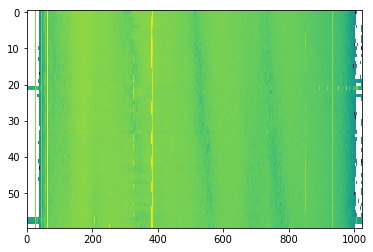

In [10]:
plt.imshow(np.log10(np.abs(blraw.data_array.squeeze()/~blraw.flag_array.squeeze())),aspect='auto')

divide by zero encountered in log10


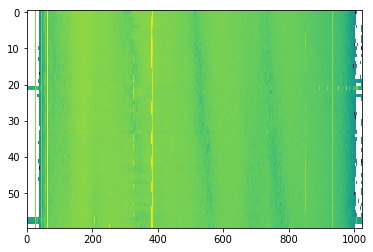

In [12]:
plt.imshow(np.log10(np.abs(blcal.data_array.squeeze()/blcal.flag_array.squeeze())),aspect='auto')

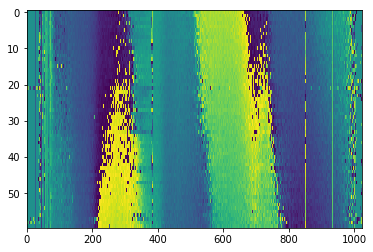

In [13]:
plt.imshow(np.angle(blraw.data_array.squeeze()), aspect='auto')

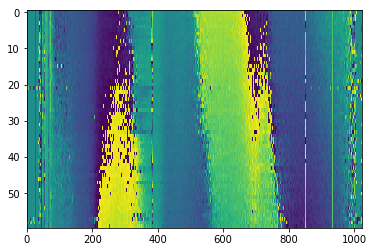

In [14]:
plt.imshow(np.angle(blcal.data_array.squeeze()), aspect='auto')

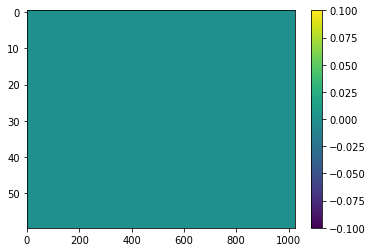

In [15]:
plt.imshow(np.angle(blcal.data_array.squeeze()-blraw.data_array.squeeze()), aspect='auto')
plt.colorbar()

In [16]:
uvc.ant2ind(52)

20

In [17]:
uvc.gain_array.shape

(52, 1, 1024, 60, 2)

In [20]:
uvc.gain_array.shape

(52, 1, 1024, 60, 2)

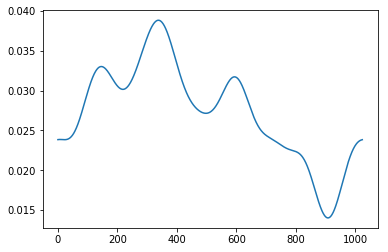

In [22]:
plt.plot(np.abs(uvc.gain_array[uvc.ant2ind(52),0,:,0,0]))

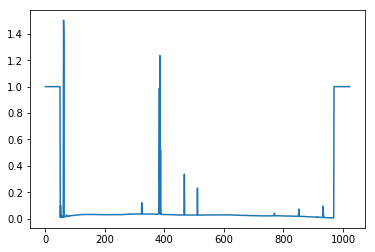

In [26]:
plt.plot(np.abs(uvc.gain_array[uvc.ant2ind(53),0,:,0,0]))
plt.ylim([])